In [222]:
import pandas as pd

In [219]:
# pip install pandas

In [221]:
# pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [223]:
anime= pd.read_csv("/content/drive/MyDrive/anime.csv")

In [224]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [225]:
anime.shape

(12294, 7)

In [226]:
anime = anime[['anime_id','name','genre','type']]

In [227]:
anime.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [228]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int64 
 1   name      12294 non-null  object
 2   genre     12232 non-null  object
 3   type      12269 non-null  object
dtypes: int64(1), object(3)
memory usage: 384.3+ KB


In [229]:
anime.isnull().sum()

anime_id     0
name         0
genre       62
type        25
dtype: int64

In [230]:
anime.dropna(inplace=True)

In [231]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
dtype: int64

In [232]:
anime['tags'] = anime['genre'] + ' '+ anime['type']

In [233]:
anime.head()

,anime_id,name,genre,type,tags
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,"Drama, Romance, School, Supernatural Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,"Sci-Fi, Thriller TV"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Action, Comedy, Historical, Parody, Samurai, S..."


In [234]:
anime = anime.drop(columns =['genre','type'])

In [235]:
anime.sample()

,anime_id,name,tags
10006,30360,Poppen-sensei to Kaerazu no Numa,"Adventure, Fantasy, Kids Special"


In [236]:
# anime['tags'] = anime['tags'].apply(lambda x: " ".join(x))

In [237]:
anime.head(10)

,anime_id,name,tags
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller TV"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports TV"
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power TV"
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space OVA"
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S..."
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S..."


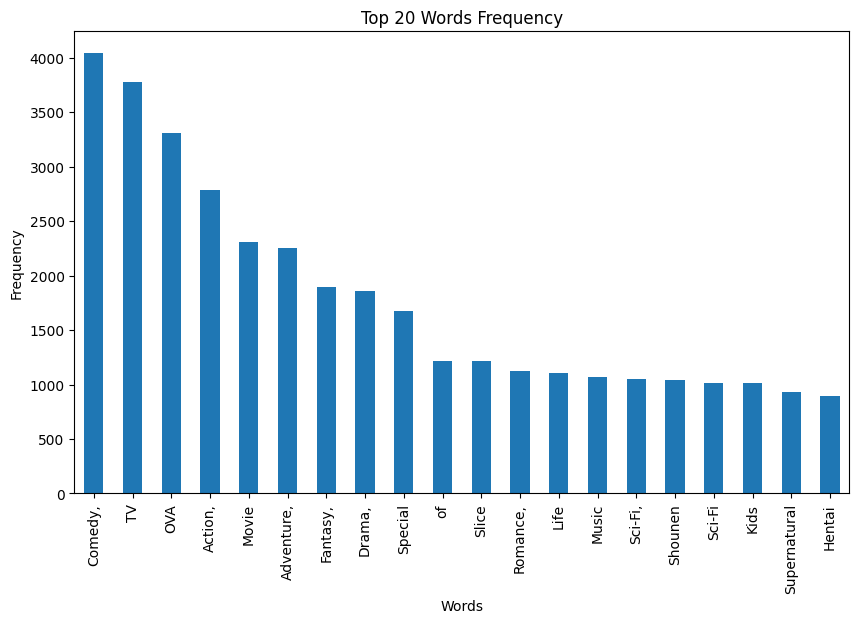

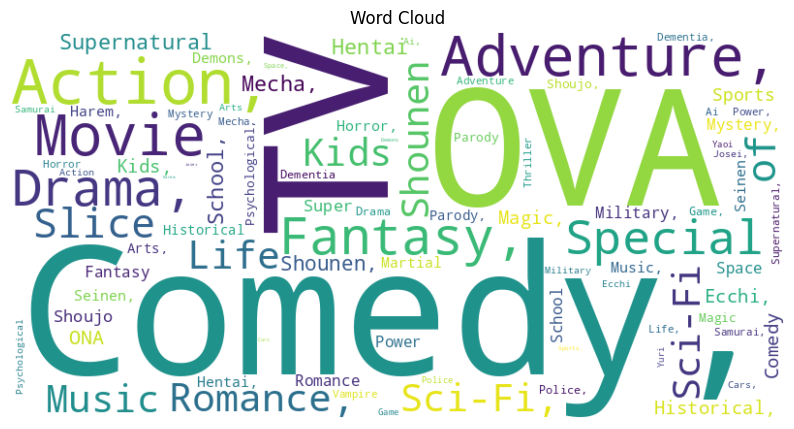

In [238]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming your dataset is loaded into a DataFrame named 'df' and the column containing text data is named 'text_column'

# Step 1: Tokenization
words = ' '.join(anime['tags']).split()

# Step 2: Counting Word Frequency
word_freq = pd.Series(words).value_counts()

# Step 3: Visualization - Bar Plot
plt.figure(figsize=(10, 6))
word_freq[:20].plot(kind='bar')
plt.title('Top 20 Words Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Step 3: Visualization - Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [239]:
def collapse(L):
    return ''.join(L.split(","))

In [240]:
new_anime = anime['tags'].apply(collapse)

In [241]:
new_anime = pd.DataFrame(new_anime)

In [242]:
new_anime.head()
new_anime.column=['tags']

<ipython-input-242-94c58b2235aa>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_anime.column=['tags']


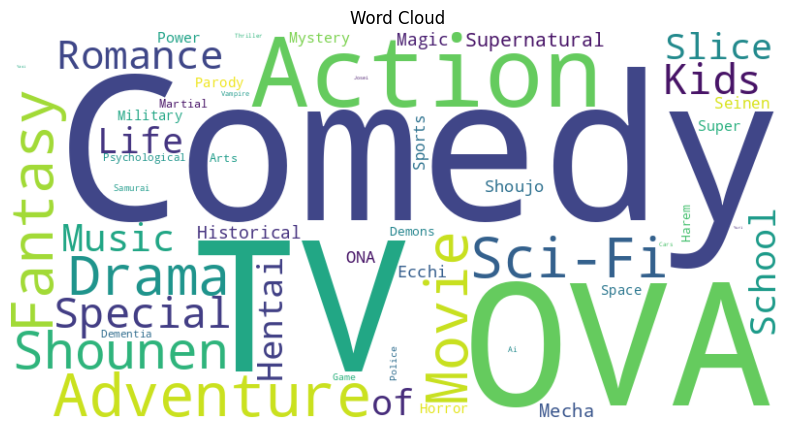

In [243]:
words = ' '.join(new_anime['tags']).split()
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [244]:
new_anime['tags'].count()

12210

In [245]:
anime['tags'] = anime['tags'].apply(collapse)

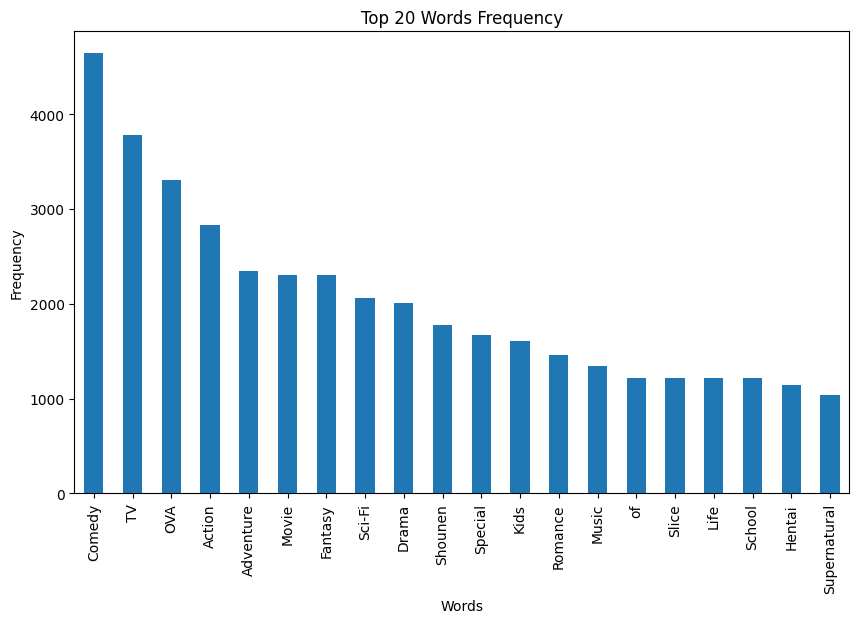

In [246]:
words = ' '.join(anime['tags']).split()
word_freq = pd.Series(words).value_counts()
plt.figure(figsize=(10, 6))
word_freq[:20].plot(kind='bar')
plt.title('Top 20 Words Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [201]:
vector = cv.fit_transform(anime['tags']).toarray()

In [202]:
vector.shape

(12210, 51)

In [204]:
print(vector)

[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [203]:
from sklearn.metrics.pairwise import cosine_similarity

In [205]:
similarity = cosine_similarity(vector)

In [206]:
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.15811388, 1.        , 0.35355339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [213]:
def recommend(anime, anime_name):
    index = anime[anime['name'] == anime_name].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distances[1:6]:
        print(anime.iloc[i[0]]['name'])

# Assuming anime_df contains your DataFrame with anime data
recommend(anime, "Fullmetal Alchemist: Brotherhood")


Fullmetal Alchemist
Magi: The Kingdom of Magic
Magi: The Labyrinth of Magic
Magi: Sinbad no Bouken (TV)
Densetsu no Yuusha no Densetsu


In [216]:
recommend(anime,"Kimi no Na wa.")

Aura: Maryuuin Kouga Saigo no Tatakai
Kokoro ga Sakebitagatterunda.
Harmonie
Air Movie
Hotarubi no Mori e


In [247]:
import pickle
pickle.dump(anime,open('anime_list.pkl','wb'))
# pickle.dump(similarity,open('similarity.pkl','wb'))